# Exploratory Data Analysis

In [1]:
# import all needed libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

#read in the csv data created in 00_LoadData.py
# set the ? as NA values
df = pd.read_csv("fullrecords.csv", na_values = "?")

print("Data dimensions: ")
print(df.shape)

#print first 5 rows
df

Data dimensions: 
(48842, 22)


,id,age,workclass_id,education_level_id,education_num,marital_status_id,occupation_id,relationship_id,race_id,sex_id,...,hours_week,country_id,over_50k,workclass,educlevel,maritalstatus,occup,race,sex,country
0,1,39,8,10,13,5,2,2,5,2,...,40,40,0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,United-States
1,2,50,7,10,13,3,5,1,5,2,...,13,40,0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,United-States
2,3,38,5,12,9,1,7,2,5,2,...,40,40,0,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,United-States
3,4,53,5,2,7,3,7,1,3,2,...,40,40,0,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States
4,5,28,5,10,13,3,11,6,3,1,...,40,6,0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48838,39,5,10,13,1,11,2,5,1,...,36,40,0,Private,Bachelors,Divorced,Prof-specialty,White,Female,United-States
48838,48839,64,1,12,9,7,1,3,3,2,...,40,40,0,NaN,HS-grad,Widowed,NaN,Black,Male,United-States
48839,48840,38,5,10,13,3,11,1,5,2,...,50,40,0,Private,Bachelors,Married-civ-spouse,Prof-specialty,White,Male,United-States
48840,48841,44,5,10,13,1,2,4,2,2,...,40,40,0,Private,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male,United-States


In [2]:
#check columns
df.columns

Index(['id', 'age', 'workclass_id', 'education_level_id', 'education_num',
       'marital_status_id', 'occupation_id', 'relationship_id', 'race_id',
       'sex_id', 'capital_gain', 'capital_loss', 'hours_week', 'country_id',
       'over_50k', 'workclass', 'educlevel', 'maritalstatus', 'occup', 'race',
       'sex', 'country'],
      dtype='object')

In [3]:
# drop the id columns that were used to join with the other tables
df.drop(['workclass_id','education_level_id','marital_status_id','occupation_id',
         'relationship_id','race_id','sex_id','country_id'], axis = 1, inplace = True)

df.columns

Index(['id', 'age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_week', 'over_50k', 'workclass', 'educlevel', 'maritalstatus',
       'occup', 'race', 'sex', 'country'],
      dtype='object')

In [4]:
# check data types
df.dtypes

id                int64
age               int64
education_num     int64
capital_gain      int64
capital_loss      int64
hours_week        int64
over_50k          int64
workclass        object
educlevel        object
maritalstatus    object
occup            object
race             object
sex              object
country          object
dtype: object

In [5]:
# check missing values
df.isnull().sum()

id                  0
age                 0
education_num       0
capital_gain        0
capital_loss        0
hours_week          0
over_50k            0
workclass        2799
educlevel           0
maritalstatus       0
occup            2809
race                0
sex                 0
country           857
dtype: int64

### Explore continuous values

In [6]:
#univariate analysis of the continuous variables
cont = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_week']

df[cont].describe()

,age,education_num,capital_gain,capital_loss,hours_week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


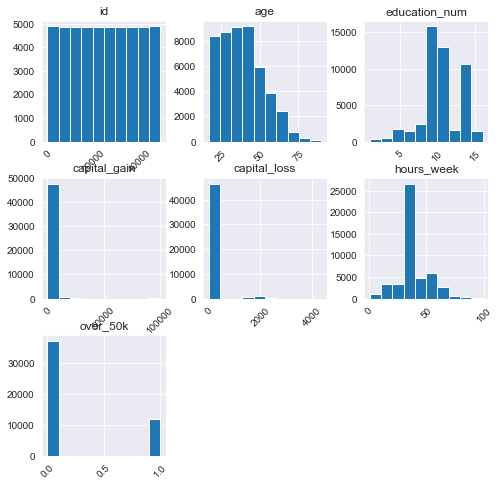

In [7]:
# use historgrams to visualize
df.hist(figsize=(8,8), xrot=45)
plt.show()

Looking at the univariate analysis and histograms show that `capital_loss` and `capital_gain` are mostly 0 for the majority of records. The lack of variability means they might not be as useful for a modeling exercise. We can also see that the target variable `over_50k` is binary as expected.

Next let's look at each variable against the response var `over_50k`

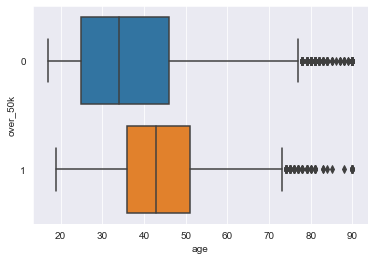

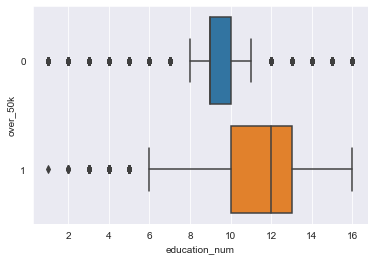

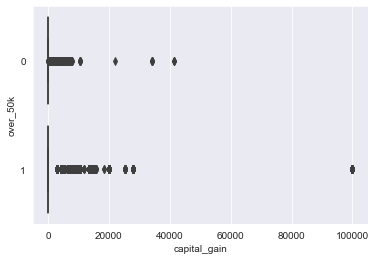

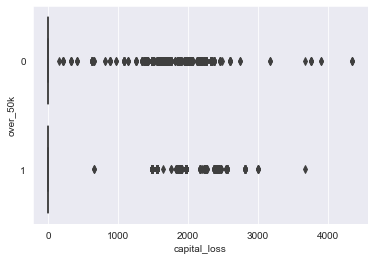

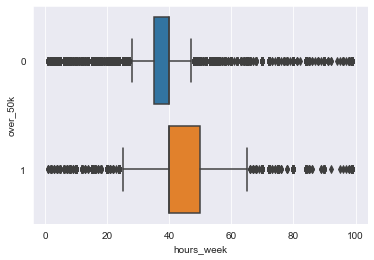

In [12]:
# plot boxplots of continuous variables by target
for var in cont:
    sns.boxplot(y = df['over_50k'].astype('category'), x = var, data = df)
    plt.show()

The plots of both `capital_gains` and `capital_loss` by `over_50k` are 0 as well which suggests that there are a lot of zero values confirming they are unlikely to be useful in a modeling exercise.

`age`, `education_num`, and `hours_week` all show that those making less than 50k are usually younger, with less years of education, and working fewer hours per week.

### Explore categorical values

In [9]:
#start by getting a summary for the categorical values including the top category and number of levels
df.describe(include='object')

,workclass,educlevel,maritalstatus,occup,race,sex,country
count,46043,48842,48842,46033,48842,48842,47985
unique,8,16,7,14,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,White,Male,United-States
freq,33906,15784,22379,6172,41762,32650,43832


For both `race` and `country` the top category accounts for over 40k records out of approximately 49k records. The lack of variability suggests they may not be as helpful.

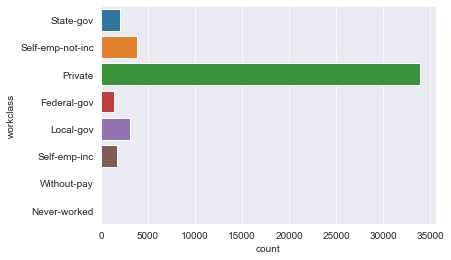

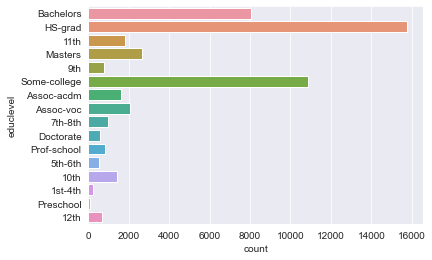

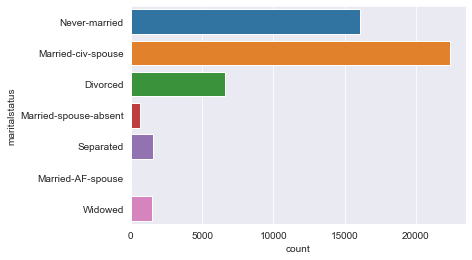

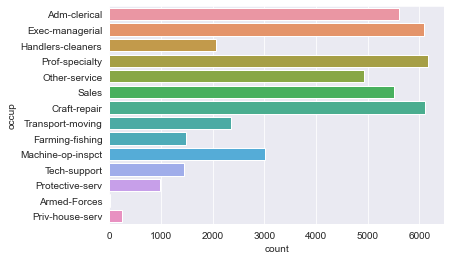

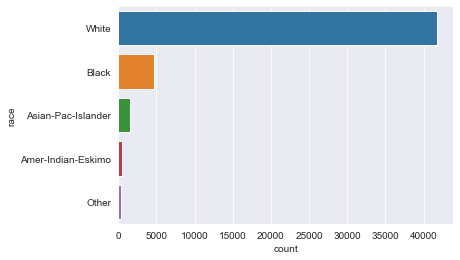

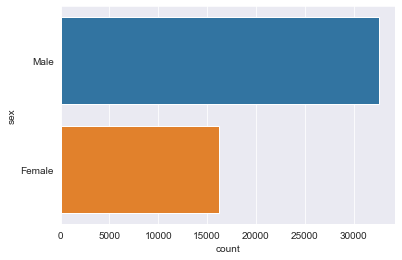

In [11]:
# let's plot the categorical distributions
for col in df.select_dtypes(include = 'object'):
    if df[col].nunique() <= 22: #only plot when there are less than 22 categories (all but country)
        sns.countplot(y=col, data=df)
        plt.show()

Looking at the plots there are a number of very small categories for education level that could be collapsed and the potential for collapsing work class as well.

In [ ]:
# let's make the collapses to create variables that are easier to visualize in 

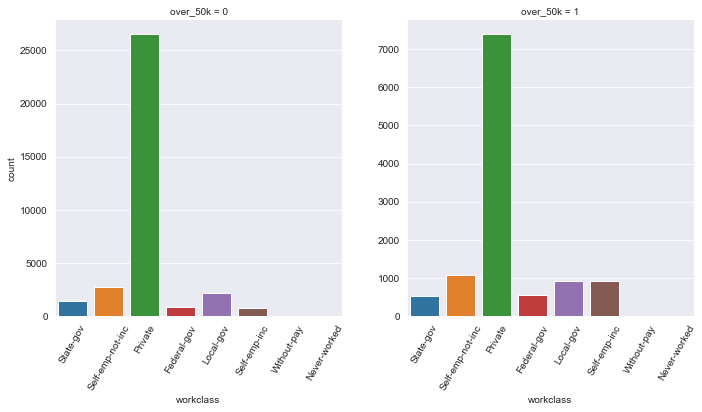

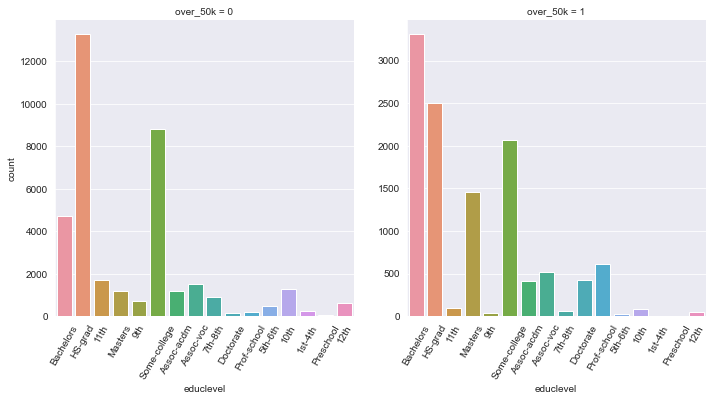

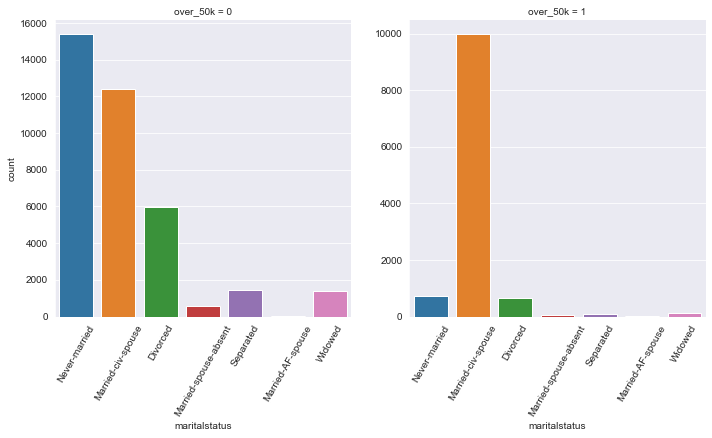

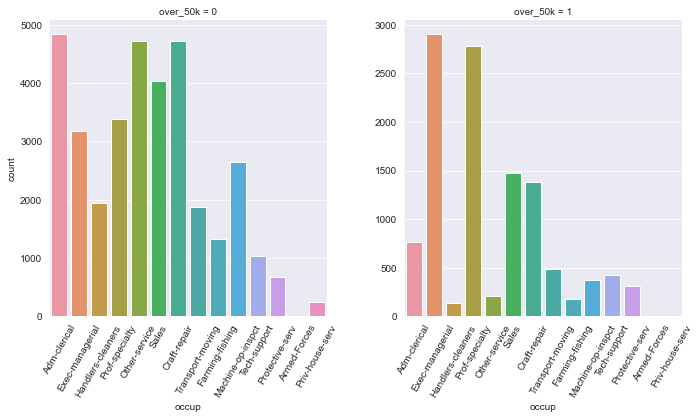

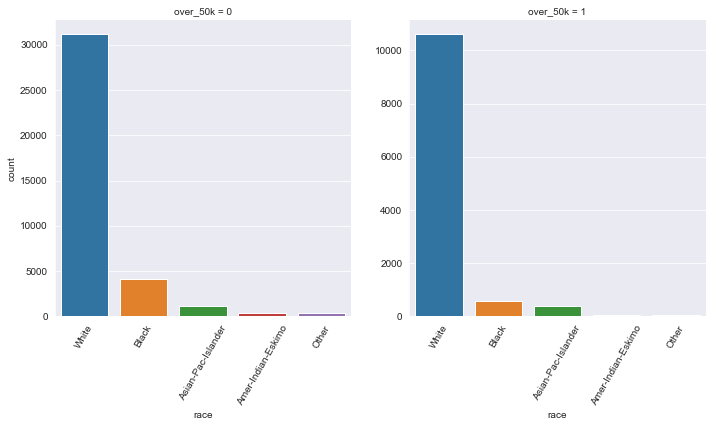

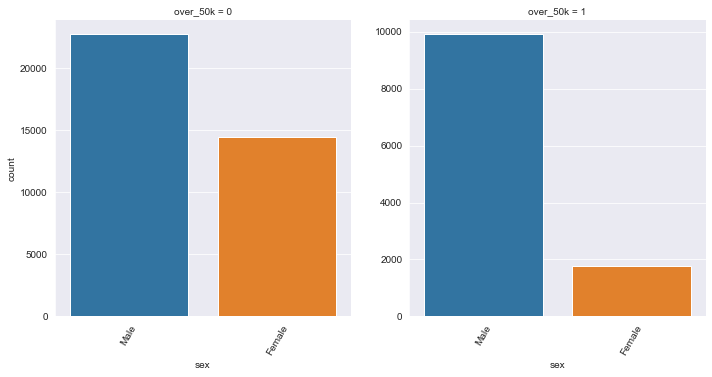

In [13]:
# we can now use plots to compare the categorical values against `over_50k`
for var in df.select_dtypes(include='object'):
    if df[var].nunique() <= 22:
        g = sns.catplot(x = var, kind = 'count', col = 'over_50k', data=df, sharey = False)
        g.set_xticklabels(rotation = 60)

`workclass` and `race` don't show much difference depending on the target and `sex` only shows real differences for women. The remaining variables do show variance between the columns when compared to the target which suggests that they will be useful in the modeling process.

### Explore relationship between predictor variables

In [16]:
# compare medians (given high number of 0s in capital variables) of continuous variables within categorical 
# variable groups 
for var in df.select_dtypes(include='object'):
    if df[var].nunique() <= 22:
        display(df.groupby(var)[cont].median())

,age,education_num,capital_gain,capital_loss,hours_week
workclass,,,,,
Federal-gov,43.0,10.0,0.0,0.0,40.0
Local-gov,41.0,10.0,0.0,0.0,40.0
Never-worked,18.0,7.0,0.0,0.0,35.0
Private,35.0,10.0,0.0,0.0,40.0
Self-emp-inc,45.0,10.0,0.0,0.0,50.0
Self-emp-not-inc,44.0,10.0,0.0,0.0,40.0
State-gov,39.0,11.0,0.0,0.0,40.0
Without-pay,51.0,9.0,0.0,0.0,40.0


,age,education_num,capital_gain,capital_loss,hours_week
educlevel,,,,,
10th,35.0,6.0,0.0,0.0,40.0
11th,28.0,7.0,0.0,0.0,40.0
12th,28.0,8.0,0.0,0.0,40.0
1st-4th,46.0,2.0,0.0,0.0,40.0
5th-6th,43.0,3.0,0.0,0.0,40.0
7th-8th,51.0,4.0,0.0,0.0,40.0
9th,39.0,5.0,0.0,0.0,40.0
Assoc-acdm,37.0,12.0,0.0,0.0,40.0
Assoc-voc,37.0,11.0,0.0,0.0,40.0


,age,education_num,capital_gain,capital_loss,hours_week
maritalstatus,,,,,
Divorced,42.0,10.0,0.0,0.0,40.0
Married-AF-spouse,30.0,10.0,0.0,0.0,40.0
Married-civ-spouse,42.0,10.0,0.0,0.0,40.0
Married-spouse-absent,40.0,9.0,0.0,0.0,40.0
Never-married,25.0,10.0,0.0,0.0,40.0
Separated,39.0,9.0,0.0,0.0,40.0
Widowed,60.0,9.0,0.0,0.0,40.0


,age,education_num,capital_gain,capital_loss,hours_week
occup,,,,,
Adm-clerical,35.0,10.0,0.0,0.0,40.0
Armed-Forces,29.0,10.0,0.0,0.0,40.0
Craft-repair,38.0,9.0,0.0,0.0,40.0
Exec-managerial,41.0,12.0,0.0,0.0,40.0
Farming-fishing,39.0,9.0,0.0,0.0,40.0
Handlers-cleaners,29.0,9.0,0.0,0.0,40.0
Machine-op-inspct,36.0,9.0,0.0,0.0,40.0
Other-service,32.0,9.0,0.0,0.0,40.0
Priv-house-serv,43.0,9.0,0.0,0.0,35.0


,age,education_num,capital_gain,capital_loss,hours_week
race,,,,,
Amer-Indian-Eskimo,35.0,9.0,0.0,0.0,40.0
Asian-Pac-Islander,36.0,10.0,0.0,0.0,40.0
Black,36.0,9.0,0.0,0.0,40.0
Other,31.0,9.0,0.0,0.0,40.0
White,37.0,10.0,0.0,0.0,40.0


,age,education_num,capital_gain,capital_loss,hours_week
sex,,,,,
Female,35.0,10.0,0.0,0.0,40.0
Male,38.0,10.0,0.0,0.0,40.0


In [17]:
# check correlation between the continuous variables

corr = df.corr()
corr

,id,age,education_num,capital_gain,capital_loss,hours_week,over_50k
id,1.000000,0.006460,-0.001114,-0.000092,-0.000002,-0.001312,-0.001475
age,0.006460,1.000000,0.030940,0.077229,0.056944,0.071558,0.230369
education_num,-0.001114,0.030940,1.000000,0.125146,0.080972,0.143689,0.332613
capital_gain,-0.000092,0.077229,0.125146,1.000000,-0.031441,0.082157,0.223013
capital_loss,-0.000002,0.056944,0.080972,-0.031441,1.000000,0.054467,0.147554
hours_week,-0.001312,0.071558,0.143689,0.082157,0.054467,1.000000,0.227687
over_50k,-0.001475,0.230369,0.332613,0.223013,0.147554,0.227687,1.000000


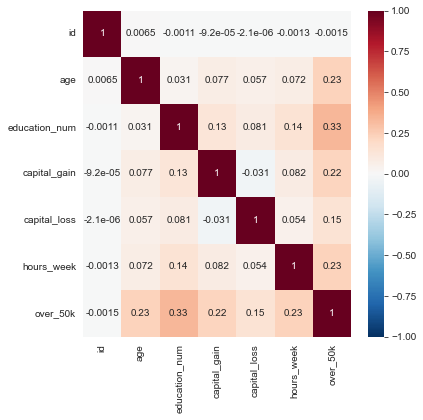

In [18]:
# plot the heatmap of the correlations to make it easier to visualize
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot = True, vmax = 1, vmin = -1)
plt.show()

Not seeing any large correlations between predictor variables, so we won't need to worry about dropping any variables due to that reason.

## Summary

- `capital_gains` and `capital_losses` are both mostly 0 and are unlikely to be helpful in the modeling process
- strong relationship between `educlevel` (categorical) and `education_num` so will likely need to choose one or the other
    - if choosing `educlevel` it should be collapsed first
- the majority of values in `country` are United States, which isn't going to make it a particulary useful variable
- `workclass` did not show much difference in the distribution of values between the target classes, so it will likely not make it into the final model
- `occup` did show some promising differences which means we'll need to impute the missing values in the data